# Lab 2: Image Transformation

Name: **Krish Agarwal** <br>
Reg No: **21112016** <br>
Class: **5BSc DS A** <br>
Date: 05/09/2023

---------------

## `Objective`: 
1. Try image transformation techniques
    1. Brightness
    1. Contrast
    1. Rotation
    1. Flip
    1. Crop
    1. Resize

## `Completion Status`:

| Question Number | Status |
| --- | --- |
| 1 A | Completed |
| 1 B | Completed |
| 1 C | Completed |
| 1 D | Completed |
| 1 E | Completed |
| 1 F | Completed |

## `Code`:

## Importing the image

In [9]:
import cv2
import matplotlib.pyplot as plt

In [15]:
image = cv2.imread("D:/Z/Downloads/minions.jpg") # original Image
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # RGB Image
image_GRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #GRAYSCALE Image

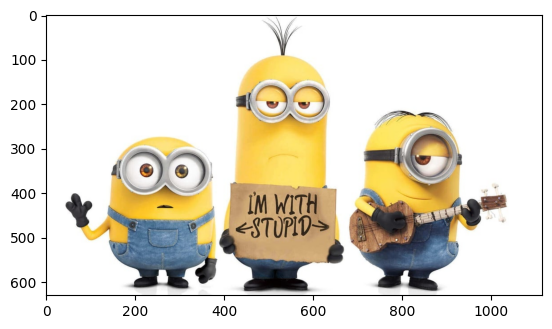

In [16]:
plt.imshow(image_RGB)
plt.show()

## Q1A) Brightness

**Method 1**

////////////////////
Brightness value:50
////////////////////
 


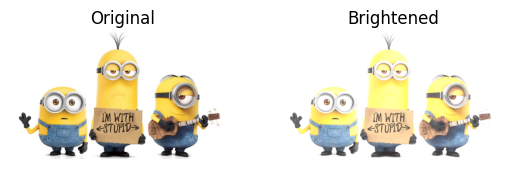

In [48]:
# askig for the input 
print("/" * 20)
beta = float(input("Brightness value: "))
print("/" * 20)
print(" ")

# Changing the brightness
brightened_image = cv2.convertScaleAbs(image_RGB, alpha=None, beta=beta)

# Sub-plotting
plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(brightened_image, cmap = 'gray'),plt.title('Brightened'),plt.axis('off')
plt.show()

**Method 2**

In [49]:
def increase_brightness(img, value):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v = v.astype('int16')
    lim = 255 - int(value)
    v[v > lim] = 255
    v[v <= lim] += int(value)
    v = v.astype('uint8')
    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

////////////////////
Brightness value:50
////////////////////
 


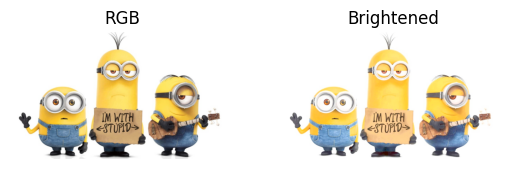

In [50]:
print("/" * 20) 
beta = float(input("Brightness value: "))
print("/" * 20)
print(" ")

brightened_image = increase_brightness(image_RGB, beta)

plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('RGB'), plt.axis('off')
plt.subplot(122),plt.imshow(brightened_image, cmap = 'gray'),plt.title('Brightened'),plt.axis('off')
plt.show()

## Q1B) Contrast

**Method 1**

In [115]:
from PIL import Image, ImageEnhance

In [118]:
def change_contrast(image, factor):
    
    # create a contrast enhancer
    enhancer = ImageEnhance.Contrast(image)

    # enhance the contrast of the image
    adjusted = enhancer.enhance(factor)

    # return the adjusted image
    return adjusted

////////////////////
Contrast value: 1.5
////////////////////
 


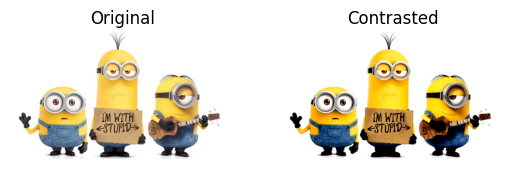

In [122]:
# importing the image 
image = Image.open("D:/Z/Downloads/minions.jpg")

# asking for the input 
print("/" * 20)
alpha = float(input("Contrast value: "))
print("/" * 20)
print(" ")

# recallig the above function
new_image = change_contrast(image, alpha)

# Sub-plotting
plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(new_image, cmap = 'gray'),plt.title('Contrasted'),plt.axis('off')
plt.show()

**Method 2**

In [103]:
def increase_contrast(img, value):
    alpha = float(131 * (value + 127)) / (127 * (131 - value))
    gamma = 127 * (1 - alpha)
    img = cv2.addWeighted(img, alpha, img, 0, gamma)
    return img

////////////////////
Contrast value: 2
////////////////////
 


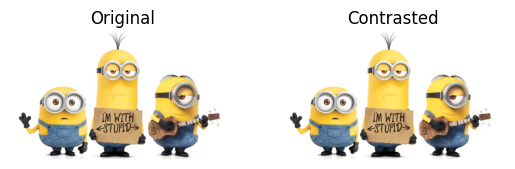

In [107]:
# asking for the input 
print("/" * 20)
alpha = float(input("Contrast value: "))
print("/" * 20)
print(" ")

# changing the contrast
contrasted_image = increase_contrast(image_RGB, alpha)

# Sub-plotting
plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(contrasted_image, cmap = 'gray'),plt.title('Contrasted'),plt.axis('off')
plt.show()

## Q1C) Rotation

In [59]:
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    # used to make the transformation matrix M which will be used for rotating a image
    M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1) # (center, angle, scale)
    # An affine transformation is any transformation that preserves collinearity, parallelism as well as the ratio 
    # of distances between the points
    rotated_img = cv2.warpAffine(img, M, (cols,rows)) #(src, M, dsize, dst)
    return rotated_img

////////////////////
Degree of Rotation:180
////////////////////
 


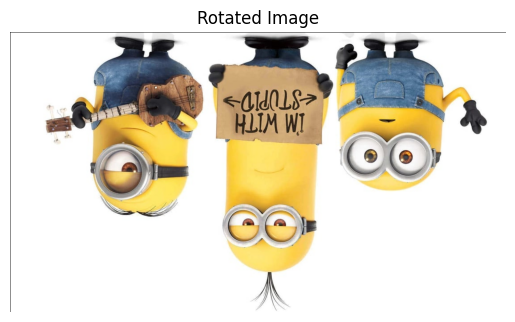

In [70]:
# asking for the input 
print("/" * 20)
degree = float(input("Degree of Rotation: "))
print("/" * 20)
print(" ")

# recallig the above function
rotated_image = rotate_image(image_RGB, degree)

# plotting the image
plt.subplot(111),plt.imshow(rotated_image, cmap = 'gray'),plt.title('Rotated Image'), plt.axis('off')
plt.show()

## Q1D) Flip

In [72]:
def flip_image(img, flip_code):
    flipped_img = cv2.flip(img, flip_code)
    return flipped_img

////////////////////
0 --> Vertically 
1 --> Horizontally 
-1 --> Horizontally and Vertically

Flip along:1
////////////////////
 


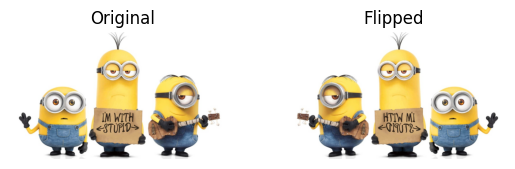

In [91]:
print("/" * 20)
print("0 --> Vertically \n1 --> Horizontally \n-1 --> Horizontally and Vertically\n")
flip = int(input("Flip along: "))
print("/" * 20)
print(" ")

# recalling the above function
flipped_image = flip_image(image_RGB, flip)

# plotting the image
plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(flipped_image, cmap = 'gray'),plt.title('Flipped'), plt.axis('off')
plt.show()

## Q1E) Crop

In [92]:
def crop_image(img, x, y, w, h):
    cropped_img = img[y:y+h, x:x+w]
    return cropped_img

////////////////////
X coordinate: 250
Y coordinate: 250
Width: 200
Height: 200
////////////////////
 


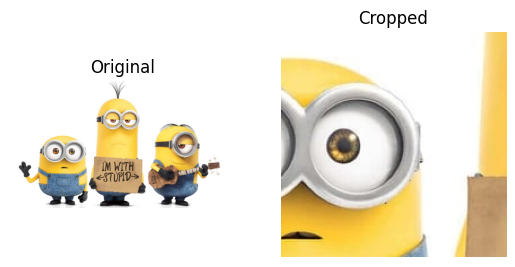

In [95]:
# asking for the input 
print("/" * 20)
x = int(input("X coordinate: "))
y = int(input("Y coordinate: "))
w = int(input("Width: "))
h = int(input("Height: "))
print("/" * 20)
print(" ")

# recalling the above function
#cropped_image = crop_image(img, x=100, y=100, w=200, h=200)
cropped_image = crop_image(image_RGB, x, y, w, h)

#sub-plotting
plt.subplot(121),plt.imshow(image_RGB, cmap = 'gray'),plt.title('Original'), plt.axis('off')
plt.subplot(122),plt.imshow(cropped_image, cmap = 'gray'),plt.title('Cropped'), plt.axis('off')
plt.show()

## Q1F) Resize

In [96]:
def resize_image(img, new_size):
    image_resized = cv2.resize(img, new_size)
    return image_resized

////////////////////
New Height: 100
New Width: 90
////////////////////
 


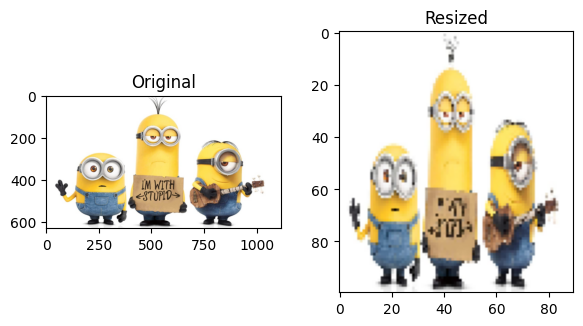

In [99]:
# asking for the input 
print("/" * 20)
w = int(input("New Height: "))
h = int(input("New Width: "))
print("/" * 20)
print(" ")

# recalling the above function 
new_size = (h, w)
resized_image = resize_image(image_RGB, new_size)

#sub-plotting
fig1, ax = plt.subplots(1, 2, figsize = (6, 6))
fig1.tight_layout()

ax[0].imshow(image_RGB)
ax[0].set_title("Original")

ax[1].imshow(resized_image)
ax[1].set_title("Resized")
plt.show()

<hr>